# Basic classification: Classify images of clothing

In [31]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [32]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:
train_images.shape

(60000, 28, 28)

In [35]:
len(train_labels)

60000

In [36]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [37]:
test_images.shape

(10000, 28, 28)

### Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

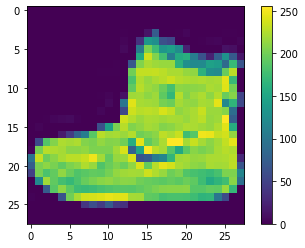

In [38]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:


In [39]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##### To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

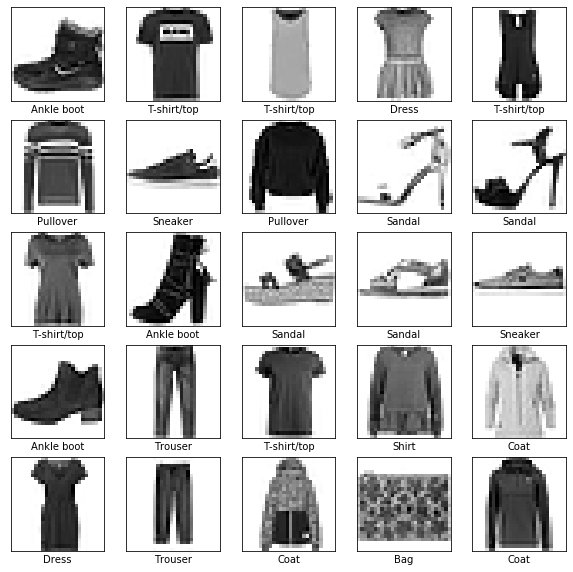

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model
##### Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model
##### Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

### Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [43]:
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.5057 - accuracy: 0.8220
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3759 - accuracy: 0.8640
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3372 - accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3146 - accuracy: 0.8845
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2961 - accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2809 - accuracy: 0.8966
Epoch 7/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2693 - accuracy: 0.8997
Epoch 8/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2587 - accuracy: 0.9026
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2496 - accuracy: 0.9072
Epoch 10/10
6

##### As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3528 - accuracy: 0.8797

Test accuracy: 0.8797


### Make predictions
With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [46]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


In [47]:
# Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

predictions[0]

array([9.4131137e-06, 9.9839921e-11, 5.9167252e-07, 3.0897437e-10,
       9.1431387e-09, 2.2944152e-04, 4.7523567e-06, 3.9987847e-02,
       1.4181246e-07, 9.5976782e-01], dtype=float32)

In [48]:
# A prediction is an array of 10 numbers. They represent the model's "confidence" that the 
# image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

np.argmax(predictions[0])

9

In [49]:
# So, the model is most confident that this image is an ankle boot, or class_names[9]. 
# Examining the test label shows that this classification is correct:

test_labels[0]

9

In [50]:
# Graph this to look at the full set of 10 class predictions.

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

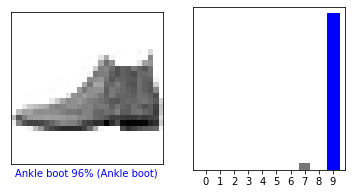

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

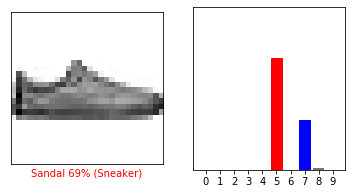

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### Let's plot several images with their predictions. Note that the model can be wrong even when very confident.



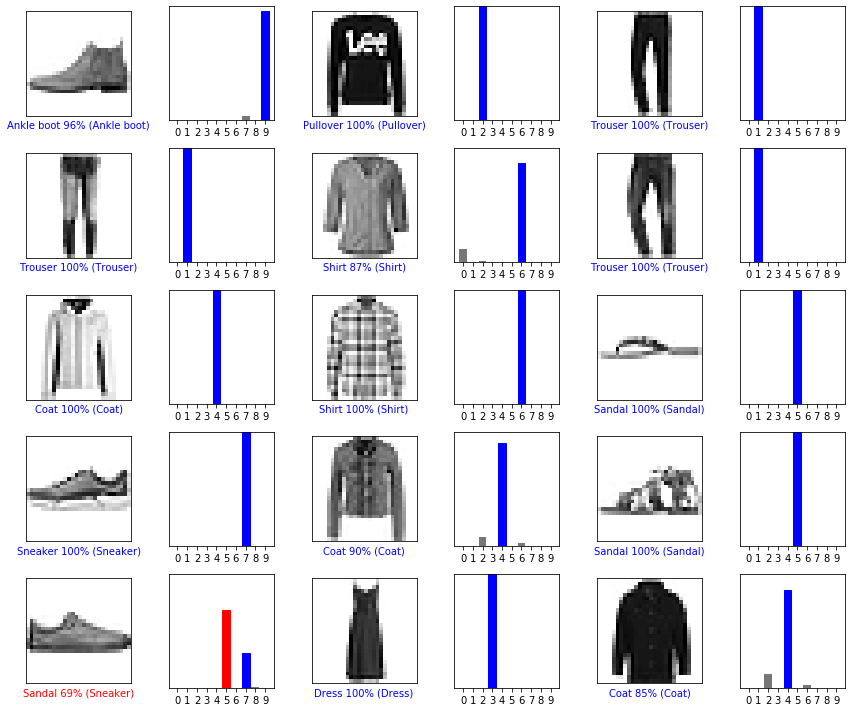

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model
Finally, use the trained model to make a prediction about a single image.


In [55]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [56]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [57]:
# Now predict the correct label for this image:

predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.00080444e-06 3.28014621e-16 9.99827743e-01 2.25350905e-10
  7.00357923e-05 3.24198897e-11 1.00162564e-04 4.71624259e-13
  4.52384692e-11 2.07610987e-13]]


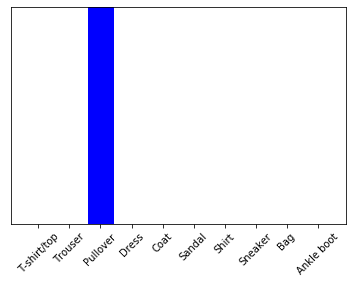

In [58]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [59]:
np.argmax(predictions_single[0])


2